For this homework, make sure that you format your notebook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: __Mehul Jain, Satyam Shivastava, Pritish Arora__

Step 1: Train your own word embeddings
--------------------------------

(describe the provided dataset that you have chosen here)

Describe what data set you have chosen to compare and contrast with the your chosen provided dataset. Make sure to describe where it comes from and it's general properties.

(describe your dataset here)

In [1]:
# import your libraries here
import pandas as pd
import string
import re 
import nltk

from gensim.models import Word2Vec
from collections import Counter
# from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer

# download stopwords list
nltk.download('punkt')
nltk.download('stopwords')
STOPWORDS=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /Users/mehuljain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mehuljain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### a) Train embeddings on GIVEN dataset

We can create a function to preprocess the text in our dataset. 

In [2]:
# preprocessing function
def preprocess(sentence:str, train:bool)-> list:
    """
    This function takes in a string and performs the following preprocessing steps:
    1. remove punctuation and URLs
    2. tokenization
    3. lower case
    4. removing stop words
    5. stemming /lemmatization (still thinking about it)
    6. padding ??
    """
    # remove punctuation
    sentence = re.sub(r'[^\w\s]', ' ', sentence)
    
    # remove urls
    sentence=re.sub(r'http\S+', '', sentence)

    # tokenize using nltk
    tokenized=nltk.word_tokenize(sentence)
    
    # lower case all the tokens
    tokenized=[t.lower() for t in tokenized]

    # remove stopwords
#     if train:
#         tokenized=[w for w in tokenized if w not in STOPWORDS]
        
    # remove single words and numbers
    # removing single words because I don't thinks there are any useful words that are 
    # made of just a single letter
    # also we dont have a use of numbers in our word embeddings 
    tokenized=[t for t in tokenized if len(t)>1 and \
               not bool(re.search("\d",t)) or t in STOPWORDS]
    
    # do we want a lexicon check to see if the words make sense?
        
    # add padding
    #tokenized= list(nltk.lm.preprocessing.pad_both_ends(tokenized, n=2))
    
    return tokenized

In [3]:
# code to train your word embeddings

# Read the file and prepare the training data 
# so that it is in the following format

# data = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]

# read the dataset
df=pd.read_csv('data/spooky-author-identification/train.csv')

# make a list of all the sentences in the dataset
sentences= list(df['text'])

# preprocess the text
tokenized=[preprocess(s,True) for s in sentences]

# preprocessed sentences
prep_sentences=[" ".join(t) for t in tokenized]

In [4]:
# list of all words from dataset A
all_words=[]
for t in tokenized:
    all_words.extend(t)
    
# count frequency of all words
mc1=Counter(all_words)

In [5]:
from gensim.models import Word2Vec

# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
# sg = 1
# window = 5
# size = EMBEDDINGS_SIZE
# min_count = 1
model=Word2Vec(tokenized,
               min_count=1,
               vector_size=EMBEDDINGS_SIZE,
               sg=1,
               window=5,
               workers=4) 

In [6]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
print('Vocab size {}'.format(len(model.wv)))

Vocab size 25075


In [7]:
# You can save file in txt format, then load later if you wish.
model.wv.save('data/embeddings')

### b) Train embedding on YOUR dataset

In [8]:
# then do a second data set
# first let's try to use the sklearn newsgroup dataset
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))

Let's see an example of the text in the dataset

In [9]:
newsgroups.data[3]

"\nThink!\n\nIt's the SCSI card doing the DMA transfers NOT the disks...\n\nThe SCSI card can do DMA transfers containing data from any of the SCSI devices\nit is attached when it wants to.\n\nAn important feature of SCSI is the ability to detach a device. This frees the\nSCSI bus for other devices. This is typically used in a multi-tasking OS to\nstart transfers on several devices. While each device is seeking the data the\nbus is free for other commands and data transfers. When the devices are\nready to transfer the data they can aquire the bus and send the data.\n\nOn an IDE bus when you start a transfer the bus is busy until the disk has seeked\nthe data and transfered it. This is typically a 10-20ms second lock out for other\nprocesses wanting the bus irrespective of transfer time.\n"

In [10]:
# preprocess the text
tokenized2=[preprocess(s,True) for s in newsgroups.data]

prep_sentences2=[" ".join(t) for t in tokenized2]

In [11]:
# list of all words from dataset B
all_words2=[]
for t in tokenized2:
    all_words2.extend(t)
    
# count frequency of all words
mc2=Counter(all_words2)

Let's train our word embeddings

In [12]:
from gensim.models import Word2Vec

# The dimension of word embedding. 
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
model2=Word2Vec(tokenized2,
               min_count=1,
               vector_size=EMBEDDINGS_SIZE,
               sg=1,
               window=5,
               workers=4)
print('Vocab size {}'.format(len(model2.wv)))

# save the word embeddings
model2.wv.save('data/newsgroups_embeddings')

Vocab size 90676


In [13]:
model2.wv['computer']

array([ 0.26674613,  0.18067257, -0.15177248,  0.3730388 ,  0.19415309,
       -0.14513464,  0.63198936,  0.0601752 ,  0.11920886,  0.6740074 ,
       -0.16780356, -0.24539344,  0.2011916 , -0.18613   , -0.03668095,
       -0.04413996, -0.4305931 ,  0.20568204,  0.59052   , -0.05610627,
        0.47746208,  0.00737748,  0.14298582,  0.247776  ,  0.3074958 ,
        0.06986982, -0.22287434, -0.29795653, -0.36052483, -0.24866213,
        0.48444188,  0.06439988,  0.6008411 , -0.47411284, -0.08589619,
       -0.19040471,  0.18043566, -0.18831211,  0.26908287, -0.31294718,
       -0.40550524, -0.05584607, -0.43299922,  0.04050212,  0.1268708 ,
        0.14028141, -0.5421083 , -0.4091731 ,  0.05401567,  0.37166047,
       -0.23153052,  0.08733241, -0.39022934, -0.00498268,  0.25584593,
       -0.14827342,  0.6707704 , -0.4121341 , -0.32964522, -0.30864963,
       -0.18107261, -0.3604771 ,  0.15358071, -0.08898423, -0.37605524,
       -0.18883045, -0.03769522,  0.04247787, -0.2915575 ,  0.51

What text-normalization and pre-processing did you do and why? __YOUR ANSWER HERE__

Step 2: Evaluate the differences between the word embeddings
----------------------------

(make sure to include graphs, figures, and paragraphs with full sentences)

In [14]:
# import libraries here
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

In [15]:
model.wv.most_similar('man', topn=10)

[('gentleman', 0.8597976565361023),
 ('lady', 0.821376383304596),
 ('zadok', 0.8208986520767212),
 ('woman', 0.8134612441062927),
 ('arthur', 0.8016908168792725),
 ('jermyn', 0.7980324625968933),
 ('captain', 0.796175479888916),
 ('physician', 0.7951582670211792),
 ('poet', 0.7916415333747864),
 ('talk', 0.788877546787262)]

In [16]:
model2.wv.most_similar('man', topn=10)

[('woman', 0.6209145188331604),
 ('fist', 0.5938369035720825),
 ('story', 0.5847249031066895),
 ('spectacular', 0.5787712931632996),
 ('spider', 0.5764255523681641),
 ('hologram', 0.5528842210769653),
 ('hail', 0.5526504516601562),
 ('wast', 0.5483222603797913),
 ('judas', 0.5474623441696167),
 ('tales', 0.5438940525054932)]

The two word embeddings have certainly learned different representations for the same word. Let's try to quantify this difference.

<b>Analysis strategy 1:</b>

1. Take 5 most common words from dataset A and 5 from dataset B (not a good idea, instead let's look for the most relevant words). Maybe we should use Tf-Idf and sort the words with the highest values?
2. Apply T-SNE and visualize the clusters
3. Visualize the word embeddings in 3D space

<b>Analysis strategy 2:</b>
Word Analogies (Source 2)

<b> Analysis strategy 3:</b>
Compare cosine similarity with gold values (Simlex?)


In [17]:
def clusters(words: list, model)-> (list,list):
    """
    This function takes in a list of words and returns two lists:
    1. the first list contains all embedding values
    2. the second list contains the list of words similar to the input words
    
    Maybe we should return a dictionary like {word:[(word,embedding)]}
    
    Parameters:
    words: the list of relevant words
    model: Word2Vec model to be used
    
    Returns:
    embedding clusters: list of list
    word_clusters: list of list
    """
    
    # embedding clusters and word clusters
    ec=[]
    wc=[]
    
    for w in words:
        
        embeddings=[]
        similar_words=[]
        
        for sw, _ in model.wv.most_similar(w, topn=30):
            
            # add embedding vector
            embeddings.append(model.wv[sw])
            
            # add similar word
            similar_words.append(sw)
        
        # add list of embeddings
        # add list of similar words
        ec.append(embeddings)
        wc.append(similar_words)
        
    return ec , wc

In [18]:
def plot_clusters(e_clusters, w_clusters, labels, title):
    """
    Add function description
    """
    
    # what is the figure size?
    plt.figure(figsize=(12,8))
    
    # what colors should the clusters be?
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    
    
    for label, embeddings, words, color in zip(labels,e_clusters,w_clusters,colors):
        
        # seperate x and y dimension of the embeddings 
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        
        c=color.reshape(1,-1)
        
        plt.scatter(x, y, c=c, alpha=0.7, label=label)
        
        for i, word in enumerate(words):
            
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
            
    # the legend should be outside the figure        
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    # plot the title
    plt.title(title)
    
    plt.grid(True)
    
#     if filename:
#         plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')

    # plot the clusters 
    plt.show()

Getting relevant words for the first dataset

In [23]:
# Create a TfidfVectorizer object with stop words removed
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

vectorizer = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS))

# Fit the vectorizer to the corpus
tfidf_matrix = vectorizer.fit_transform(sentences)

# Get the feature names (i.e., words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary to store the TF-IDF scores for each word
word_scores = {}

# Loop over each word and document in the TF-IDF matrix 
for i, word in enumerate(feature_names):
    scores = tfidf_matrix[:, i].toarray()
    word_scores[word] = scores.sum()
    
sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

# get the relevant words
rw=[]
for word, score in sorted_words[:5]:
    print(f"{word}: {score}")
    rw.append(word)

said: 148.41824513431368
did: 138.93639081270666
man: 134.74797564884355
time: 127.60534462994659
night: 105.8686741467758


Getting relevant words for the second dataset

In [27]:
vectorizer = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS))

# Fit the vectorizer to the corpus
tfidf_matrix = vectorizer.fit_transform(newsgroups.data)

# Get the feature names (i.e., words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary to store the TF-IDF scores for each word
word_scores = {}

# Loop over each word and document in the TF-IDF matrix 
for i, word in enumerate(feature_names):
    scores = tfidf_matrix[:, i].toarray()
    word_scores[word] = scores.sum()
    
sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

# get the top 5 words
rw2=[]
for word, score in sorted_words[:5]:
    print(f"{word}: {score}")
    rw2.append(word)

like: 239.60031030469838
just: 238.90562536254953
don: 236.88158048418714
know: 235.75750633756581
people: 208.37428104309123


In [30]:
sorted_words[:20]

[('like', 239.60031030469838),
 ('just', 238.90562536254953),
 ('don', 236.88158048418714),
 ('know', 235.75750633756581),
 ('people', 208.37428104309123),
 ('think', 200.38065711302383),
 ('does', 197.06001788922617),
 ('use', 171.94889898782657),
 ('thanks', 167.43638167483866),
 ('good', 164.77881726515633),
 ('time', 164.4356577489174),
 ('ve', 147.1346472417118),
 ('new', 146.17306115360168),
 ('god', 135.48059467234705),
 ('way', 131.5360844050018),
 ('make', 131.18302238255887),
 ('need', 129.3461458352917),
 ('did', 128.54736665329895),
 ('want', 128.36372075090964),
 ('windows', 128.03769894292844)]

In [40]:
# make a list of the relevant words
# relevant_words=["story","man","ghost","night","evil",\
#                 "information","source","word","president","article"]
relevant_words=["said","did","man","time","night",\
                "windows","good","people","think","god"]

# get list of embedding vectors and similar words
embed_cl,word_cl= clusters(relevant_words, model)
embed_cl2,word_cl2= clusters(relevant_words,model2)

# convert into numpy arrays
embed_cl=np.array(embed_cl)
embed_cl2=np.array(embed_cl2)

Let's visualize for the first dataset

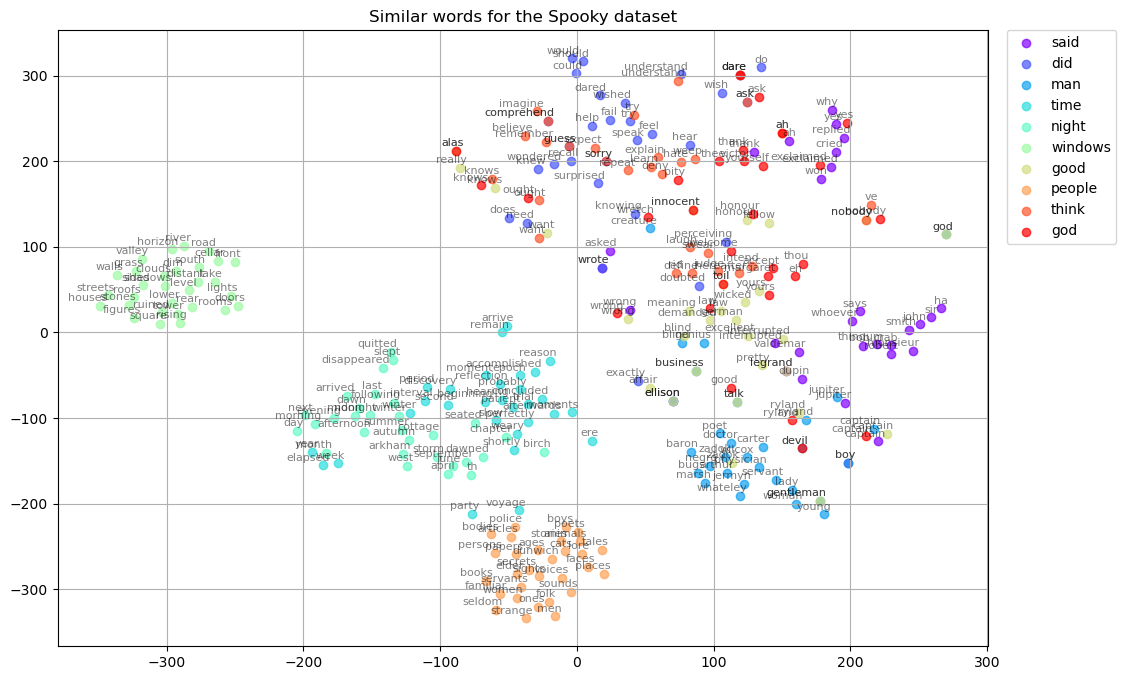

In [41]:
n, m, k = embed_cl.shape

# apply T-SNE
tsne_model2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3000,random_state=42)
embeddings2d = np.array(tsne_model2d.fit_transform(embed_cl.reshape(n * m, k))).\
                        reshape(n, m, 2)

# visualize the dataset 
plot_clusters(embeddings2d, word_cl, relevant_words, "Similar words for the Spooky dataset" )

Let's visualize for the second dataset

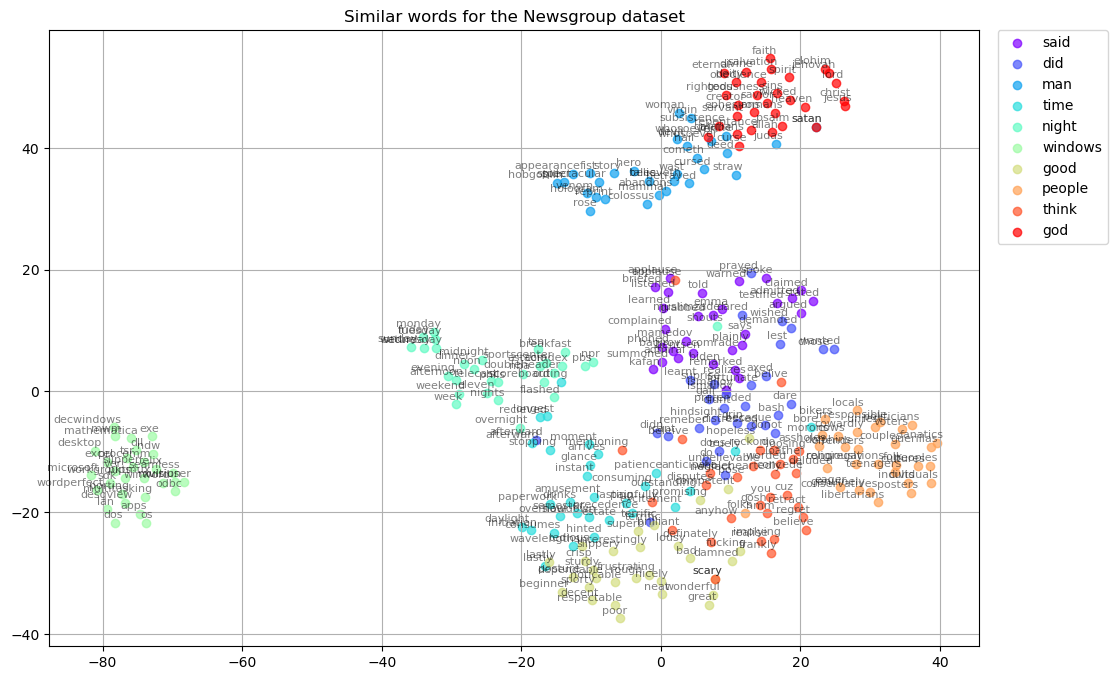

In [42]:
n, m, k = embed_cl2.shape

# apply T-SNE
tsne_model2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=42)
embeddings2d = np.array(tsne_model2d.\
                        fit_transform(embed_cl2.reshape(n * m, k))).\
                        reshape(n, m, 2)

# visualize the dataset 
plot_clusters(embeddings2d, word_cl2, relevant_words, "Similar words for the Newsgroup dataset" )

Analysis strategy 2: Word Analogies

In [43]:
# checking for positive similarities
model.wv.most_similar(positive = ['man'], topn=10)

[('gentleman', 0.8597976565361023),
 ('lady', 0.821376383304596),
 ('zadok', 0.8208986520767212),
 ('woman', 0.8134612441062927),
 ('arthur', 0.8016908168792725),
 ('jermyn', 0.7980324625968933),
 ('captain', 0.796175479888916),
 ('physician', 0.7951582670211792),
 ('poet', 0.7916415333747864),
 ('talk', 0.788877546787262)]

In [44]:
# checking for negative similarities, which basically means the dissimilar words
model.wv.most_similar(negative = ['man'], topn=10)

[('mille', -0.1569289267063141),
 ('et', -0.17769791185855865),
 ('yxu', -0.20776335895061493),
 ('their', -0.24494409561157227),
 ('its', -0.25468698143959045),
 ('est', -0.25606968998908997),
 ('were', -0.2608833611011505),
 ('heh', -0.2851482331752777),
 ('at', -0.2948409616947174),
 ('sx', -0.29534146189689636)]

In [45]:
# performing vector arithmatics to calculate the analogy of word3 given the analogy word1 -> word2
# analogy(word3) = similarity with word2 + similarity with word3 - similarity with word1
def analogy(model, word1, word2, word3):
    result = model.wv.most_similar(positive=[word2, word3], negative=[word1])
    return result[0][0]

In [46]:
#example
analogy(model,'man','sports','woman')
word1 = 'man'
word2 = 'sports'
similar_word1 = ['woman','lady']
similar_results = [analogy(model,word1, word2, similar) for similar in similar_word1]

In [47]:
# Doing a PCA to reduce dimensions of the list of input vectors to 2 and plotting the analogies in the PCA plane.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_data(feature_matrix, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(feature_matrix)
    
    plt.figure(figsize=(7, 5), dpi=100)
    
    plt.plot(data[:,0], data[:,1], '.')
    
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
        )

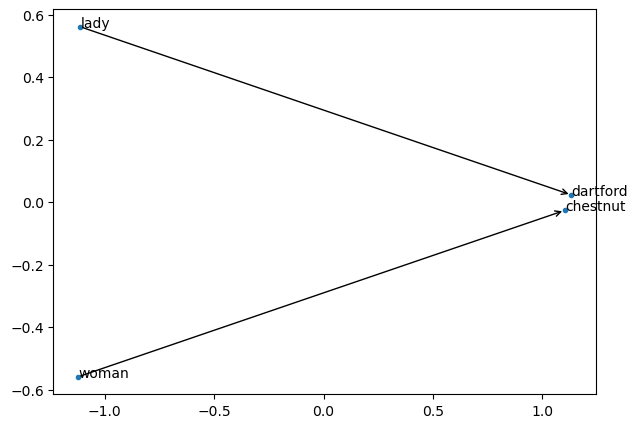

In [48]:
labels = similar_results + similar_word1
data = [model.wv[w] for w in labels]
plot_data(data, labels)

##Write down your analysis:

Cite your sources:
-------------
1. [Google News and Leo Tolstoy: Visualizing Word2Vec Word Embeddings using t-SNE](https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d)
2. [How to Solve Analogies with Word2Vec](https://towardsdatascience.com/how-to-solve-analogies-with-word2vec-6ebaf2354009)
3. []()

Step 3: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [94]:
# Importing utility functions from Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import SimpleRNN
from keras.layers import Embedding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers.legacy import Adam
import numpy as np
from numpy import zeros

# The size of the ngram language model you want to train
# change as needed for your experiments
NGRAM = 4
num_sequences_per_batch = 128 # this is the batch size
epochs=10

# Initializing a Tokenizer
# It is used to vectorize a text corpus. Here, it just creates a mapping from 
# word to a unique index. (Note: Indexing starts from 0)
# Example:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data)
# encoded = tokenizer.texts_to_sequences(data)


In [50]:
# initialize the tokenizer
tokenizer=Tokenizer()

# fit on the first dataset
tokenizer.fit_on_texts(prep_sentences)

# encoded sentences
encoded = tokenizer.texts_to_sequences(prep_sentences)

In [51]:
# let's do the same thing for the second dataset
# initialize the tokenizer
tokenizer2=Tokenizer()

# fit on the first dataset
tokenizer2.fit_on_texts(prep_sentences2)

# encoded sentences
encoded2 = tokenizer.texts_to_sequences(prep_sentences2)

### b) Next, prepare your sequences from text

#### Fixed ngram based sequences 

In [13]:
# testing mechanisms
t=["this","is","a","new","sentence"]
n=2

# this is
# is a
# a new 
# new sentence
for i in range(len(t) - n + 1):
    print(t[i:i+n])

['this', 'is']
['is', 'a']
['a', 'new']
['new', 'sentence']


In [14]:
# can we make ngrams using list comprehensions
ngram=[
    ["this","is","a","new","sentence"],
    ["this","is","another","sentence"]
]

[sen[i:i+n] for sen in ngram for i in range(len(sen)-n +1)]

[['this', 'is'],
 ['is', 'a'],
 ['a', 'new'],
 ['new', 'sentence'],
 ['this', 'is'],
 ['is', 'another'],
 ['another', 'sentence']]

In [53]:
def generate_ngram_training_samples(ngram: list, n: int) -> list:
    '''
    Takes the encoded data (list of lists) and 
    generates the training samples out of it.
    Parameters:
    up to you, we've put in what we used
    but you can add/remove as needed
    return: 
    list of lists in the format [[x1, x2, ... , x(n-1), y], ...]
    '''
    # list of training samples
#     training_samples=[]
    
    # generate training samples
#     for sen in ngram:   
#         for i in range(len(sen)- n +1):
#             training_samples.append(sen[i:i+n])
            
    # generating training samples using list comprehension
    training_samples=[sen[i:i+n] for sen in ngram for i in range(len(sen)-n +1)]
    
    return training_samples


In [16]:
# test the function
ngram=[
    ["this","is","a","new","sentence"],
    ["this","is","another","sentence"]
]
ts= generate_ngram_training_samples(ngram, n=NGRAM)
ts

[['this', 'is', 'a', 'new'],
 ['is', 'a', 'new', 'sentence'],
 ['this', 'is', 'another', 'sentence']]

### c) Then, split the sequences into X and y and create a Data Generator

In [54]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

In [55]:
def split_X_y(training_samples: list):
    
    # get the first n-1 tokens from every training sample
    X=[i[:-1] for  i in training_samples]
    
    # get the last token from every training sample
    y=[i[-1] for  i in training_samples]
    
    return X,y 

In [59]:
def read_embeddings(filename:str, tokenizer):
    '''Loads and parses embeddings trained in earlier.
    Parameters and return values are up to you.
    
    Parameters:
    
    '''
    
    #load the embeddings
    embeddings= KeyedVectors.load(filename, mmap='r')
    
    # get word indexes from tokenizer
    word_idx= tokenizer.word_index
    
    # you may find generating the following two dicts useful:
    # word to embedding : {'the':[0....], ...}
    words=(embeddings.key_to_index.keys())
    vocab_size=len(words)
    
#     w_to_e={w: embeddings[w] for w in words}
    
    # index to embedding : {1:[0....], ...} 
#     idx_to_e={word_idx[w]: embeddings[w] for w in words}
    
    
    # intialize embedding matrix
    embedding_matrix = np.zeros((vocab_size, 200))
    
    #fill values in embedding matrix
    for word, i in word_idx.items():
        try:
            #try to set the embedding vector
            embedding_vector = embeddings[word]
            embedding_matrix[i-1] = embedding_vector
            
        except:
            # otherwise assign a randomly initialized vector 
            embedding_vector = np.random.uniform(low=-1, high=1, size=200)
            embedding_matrix[i-1] = embedding_vector
    
    
    return embedding_matrix,vocab_size

In [60]:
def data_generator(X: list, y: list, num_sequences_per_batch: int,epochs: int) -> (list,list):
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels 
    (see the to_categorical function)
    
    Parameters:
    X:
    y:
    num_sequences_per_batch:
    filename: embeddings filename
    tokenizer: tokenizer used 
    
    '''
    # number of classes
    num_classes=max(y)
    
    # initialize the batches
    num_samples=0
    X_batch=[]
    y_batch=[]
    
    for feature, target in zip(X*epochs,y*epochs):
        
        if num_samples==num_sequences_per_batch:
            
            # give the batch 
            yield np.array(X_batch),np.array(y_batch)
            
            # reset 
            num_samples=0
            X_batch=[]
            y_batch=[]
        
        # add to the batch
        X_batch.append(feature)
        y_batch.append(target)
        num_samples+=1

Generate training samples on both the datasets 

In [152]:
# Note here that the sequences were in the form: 
# sequence = [x1, x2, ... , x(n-1), y]
# We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]

# generate training samples
ts1=generate_ngram_training_samples(encoded,NGRAM+1)
ts2=generate_ngram_training_samples(encoded2,NGRAM+1)

steps_per_epoch1 = len(ts1)//num_sequences_per_batch  # Number of batches per epoch
steps_per_epoch2 = len(ts2)//num_sequences_per_batch

# seperate into X and y
X1, y1= split_X_y(ts1) 

X2, y2= split_X_y(ts2)

In [62]:
# initialize data_generator
# steps_per_epoch = len(ts1)//num_sequences_per_batch  # Number of batches per epoch
# train_generator = data_generator(X1, y1, num_sequences_per_batch,epochs)

# sample=next(train_generator) # this is how you get data out of generators
# len(sample[0]) # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)
# len(sample[1])   # (batch_size, |V|) to_categorical

### d) Train your models

Let's train the model for the first dataset

In [63]:
embedding_matrix,vocab_size =read_embeddings("data/embeddings",tokenizer)

#### Model 1: 


In [26]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

# Define the model architecture using Keras Sequential API

model = Sequential()
e = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=NGRAM, trainable=True)
model.add(e)
model.add(Flatten())
model.add(Dense(400,activation='relu'))
model.add(Dense(800,activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
# compile the model
loss=SparseCategoricalCrossentropy()
model.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])
# summarize the model
print(model.summary())


Metal device set to: Apple M1 Pro


2023-02-28 13:59:05.976557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-28 13:59:05.976946: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 200)            5015000   
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 400)               320400    
                                                                 
 dense_1 (Dense)             (None, 800)               320800    
                                                                 
 dense_2 (Dense)             (None, 25075)             20085075  
                                                                 
Total params: 25,741,275
Trainable params: 25,741,275
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
train_generator = data_generator(X1, y1, num_sequences_per_batch,epochs)

# Start training the model
model.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch1,
          epochs=epochs)

Epoch 1/10


2023-02-28 13:59:06.438644: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-28 13:59:06.704151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3487/3487 [==============================] - 115s 33ms/step - loss: 6.5200 - accuracy: 0.1241
Epoch 2/10
3487/3487 [==============================] - 113s 33ms/step - loss: 5.7424 - accuracy: 0.1459
Epoch 3/10
3487/3487 [==============================] - 112s 32ms/step - loss: 5.3177 - accuracy: 0.1577
Epoch 4/10
3487/3487 [==============================] - 112s 32ms/step - loss: 4.9083 - accuracy: 0.1696
Epoch 5/10
3487/3487 [==============================] - 113s 32ms/step - loss: 4.5094 - accuracy: 0.1850
Epoch 6/10
3487/3487 [==============================] - 112s 32ms/step - loss: 4.1078 - accuracy: 0.2148
Epoch 7/10
3487/3487 [==============================] - 112s 32ms/step - loss: 3.7762 - accuracy: 0.2540
Epoch 8/10
3487/3487 [==============================] - 112s 32ms/step - loss: 3.4699 - accuracy: 0.2960
Epoch 9/10
3487/3487 [==============================] - 112s 32ms/step - loss: 3.1845 - accuracy: 0.3397
Epoch 10/10
3487/3487 [==============================] - 113s 32ms

#### Model 2:
Let's train a lighter model for the first dataset.

In [28]:
model = Sequential()
e = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=NGRAM, trainable=True)
model.add(e)
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
# compile the model
loss=SparseCategoricalCrossentropy()
model.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])
# summarize the model
print(model.summary())

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 200)            5015000   
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 100)               80100     
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 25075)             5040075   
                                                                 
Total params: 10,155,375
Trainable params: 10,155,375
Non-trainable params: 0
_________________________________________________________________
None


2023-02-28 14:49:50.192616: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-28 14:49:50.192642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:
train_generator = data_generator(X1, y1, num_sequences_per_batch,epochs)

# Start training the model
model.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch1,
          epochs=epochs)

Epoch 1/10


2023-02-28 14:49:56.502356: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-28 14:49:56.751319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3487/3487 [==============================] - 75s 21ms/step - loss: 6.5963 - accuracy: 0.1206
Epoch 2/10
3487/3487 [==============================] - 74s 21ms/step - loss: 5.8750 - accuracy: 0.1457
Epoch 3/10
3487/3487 [==============================] - 73s 21ms/step - loss: 5.5049 - accuracy: 0.1581
Epoch 4/10
3487/3487 [==============================] - 73s 21ms/step - loss: 5.1627 - accuracy: 0.1698
Epoch 5/10
3487/3487 [==============================] - 73s 21ms/step - loss: 4.8352 - accuracy: 0.1833
Epoch 6/10
3487/3487 [==============================] - 72s 21ms/step - loss: 4.5222 - accuracy: 0.1993
Epoch 7/10
3487/3487 [==============================] - 73s 21ms/step - loss: 4.2344 - accuracy: 0.2240
Epoch 8/10
3487/3487 [==============================] - 75s 22ms/step - loss: 3.9817 - accuracy: 0.2542
Epoch 9/10
3487/3487 [==============================] - 74s 21ms/step - loss: 3.7623 - accuracy: 0.2828
Epoch 10/10
3487/3487 [==============================] - 74s 21ms/step - lo

The performance of this model is lower than the previous model. 

In [58]:
model.save("d1_model2")

INFO:tensorflow:Assets written to: d1_model2/assets


#### Model 3:

Let's train the model on the second dataset. The second dataset is significantly bigger than first one. So, we will try training a very light model initially.

In [ ]:
# load the embedding matrix
embedding_matrix2,vocab_size2 =read_embeddings("data/newsgroups_embeddings",tokenizer)

In [31]:
# define the model architecture
model2 = Sequential()
e = Embedding(vocab_size2, 200, weights=[embedding_matrix2], input_length=NGRAM, trainable=True)
model2.add(e)
model2.add(Flatten())
model2.add(Dense(50,activation='relu'))
model2.add(Dense(50,activation='relu'))
model2.add(Dense(vocab_size2, activation='softmax'))
# compile the model
loss=SparseCategoricalCrossentropy()
model2.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])
# summarize the model
print(model2.summary())

# let's first use only half of the data to train the model 
X2_train=X2[:int(len(X2)*.50)]
y2_train=y2[:int(len(y2)*.50)]
steps_per_epoch2 = len(X2_train)//num_sequences_per_batch

# generate data for the second model
train_generator = data_generator(X2_train, y2_train, num_sequences_per_batch,epochs)

# Start training the model
model2.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch2,
          epochs=epochs)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 200)            18135200  
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                40050     
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 90676)             4624476   
                                                                 
Total params: 22,802,276
Trainable params: 22,802,276
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


2023-02-28 15:04:37.404674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11060/11060 [==============================] - 594s 54ms/step - loss: 6.0803 - accuracy: 0.1165
Epoch 2/10
11060/11060 [==============================] - 595s 54ms/step - loss: 5.6673 - accuracy: 0.1389
Epoch 3/10
11060/11060 [==============================] - 596s 54ms/step - loss: 5.5248 - accuracy: 0.1456
Epoch 4/10
11060/11060 [==============================] - 596s 54ms/step - loss: 5.4309 - accuracy: 0.1499
Epoch 5/10
11060/11060 [==============================] - 598s 54ms/step - loss: 5.3599 - accuracy: 0.1534
Epoch 6/10
11060/11060 [==============================] - 595s 54ms/step - loss: 5.3023 - accuracy: 0.1564
Epoch 7/10
11060/11060 [==============================] - 645s 58ms/step - loss: 5.2544 - accuracy: 0.1590
Epoch 8/10
11060/11060 [==============================] - 589s 53ms/step - loss: 5.2154 - accuracy: 0.1613
Epoch 9/10
11060/11060 [==============================] - 592s 54ms/step - loss: 5.1813 - accuracy: 0.1633
Epoch 10/10
11060/11060 [=======================

In [59]:
model2.save("d2_model1")

INFO:tensorflow:Assets written to: d2_model1/assets


The performance of this model is not so great. Let's decrease the data we are using to train the model and increase the number of parameters (neurons) in the model.

#### Model 4:


In [35]:
# load the embedding matrix
# embedding_matrix2,vocab_size2 =read_embeddings("data/newsgroups_embeddings",tokenizer)

# define the model architecture
model2 = Sequential()
e = Embedding(vocab_size2, 200, weights=[embedding_matrix2], input_length=NGRAM, trainable=True)
model2.add(e)
model2.add(Flatten())
model2.add(Dense(100,activation='relu'))
model2.add(Dense(200,activation='relu'))
model2.add(Dense(vocab_size2, activation='softmax'))
# compile the model
loss=SparseCategoricalCrossentropy()
model2.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])
# summarize the model
print(model2.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 4, 200)            18135200  
                                                                 
 flatten_6 (Flatten)         (None, 800)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               80100     
                                                                 
 dense_19 (Dense)            (None, 200)               20200     
                                                                 
 dense_20 (Dense)            (None, 90676)             18225876  
                                                                 
Total params: 36,461,376
Trainable params: 36,461,376
Non-trainable params: 0
_________________________________________________________________
None


Training on 1% of the dataset to check if the model is training properly

In [36]:
# let's first use only 1% of the data to train the model 
X2_train=X2[:int(len(X2)*0.01)]
y2_train=y2[:int(len(X2)*0.01)]

steps_per_epoch2 = len(X2_train)//num_sequences_per_batch
epochs=20

# generate data for the second model
train_generator = data_generator(X2_train, y2_train, num_sequences_per_batch,epochs)

# Start training the model
model2.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch2,
          epochs=epochs)

Epoch 1/20


2023-03-01 01:36:03.265734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


221/221 [==============================] - 15s 67ms/step - loss: 7.5262 - accuracy: 0.0642
Epoch 2/20
221/221 [==============================] - 15s 67ms/step - loss: 6.3177 - accuracy: 0.0658
Epoch 3/20
221/221 [==============================] - 15s 67ms/step - loss: 6.0384 - accuracy: 0.0707
Epoch 4/20
221/221 [==============================] - 15s 68ms/step - loss: 5.7192 - accuracy: 0.0844
Epoch 5/20
221/221 [==============================] - 15s 67ms/step - loss: 5.3810 - accuracy: 0.0977
Epoch 6/20
221/221 [==============================] - 15s 67ms/step - loss: 5.0308 - accuracy: 0.1149
Epoch 7/20
221/221 [==============================] - 15s 67ms/step - loss: 4.6752 - accuracy: 0.1353
Epoch 8/20
221/221 [==============================] - 15s 67ms/step - loss: 4.3164 - accuracy: 0.1661
Epoch 9/20
221/221 [==============================] - 15s 67ms/step - loss: 3.9728 - accuracy: 0.2093
Epoch 10/20
221/221 [==============================] - 15s 67ms/step - loss: 3.6207 - accurac

### Model 5:

But let's add a dropout layer to the mix.

In [95]:
# define the model architecture
model2 = Sequential()
e = Embedding(vocab_size2, 200, weights=[embedding_matrix2], input_length=NGRAM, trainable=True)
model2.add(e)
model2.add(Flatten())
model2.add(Dense(100,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(200,activation='relu'))
model2.add(Dense(vocab_size2, activation='softmax'))
# compile the model
loss=SparseCategoricalCrossentropy()
model2.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])
# summarize the model
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 200)            18135200  
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               80100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 dense_6 (Dense)             (None, 90676)             18225876  
                                                                 
Total params: 36,461,376
Trainable params: 36,461,376


Training of 1% of the dataset

In [96]:
from sklearn.utils import shuffle

# let's first use 15% of the data to train the model 
X2_train, y2_train = shuffle(X2, y2)
size=int(len(X2_train)*0.05)

X2_train=X2_train[:size]
y2_train=y2_train[:size]

steps_per_epoch2 = len(X2_train)//num_sequences_per_batch
epochs=10

# generate data for the second model
train_generator = data_generator(X2_train, y2_train, num_sequences_per_batch,epochs)

# Start training the model
model2.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch2,
          epochs=epochs)

Epoch 1/10


2023-03-01 13:17:04.526533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1106/1106 [==============================] - 76s 68ms/step - loss: 6.7417 - accuracy: 0.0751
Epoch 2/10
1106/1106 [==============================] - 75s 68ms/step - loss: 5.8758 - accuracy: 0.1063
Epoch 3/10
1106/1106 [==============================] - 75s 68ms/step - loss: 5.4538 - accuracy: 0.1213
Epoch 4/10
1106/1106 [==============================] - 75s 68ms/step - loss: 5.0300 - accuracy: 0.1334
Epoch 5/10
1106/1106 [==============================] - 75s 68ms/step - loss: 4.5524 - accuracy: 0.1621
Epoch 6/10
1106/1106 [==============================] - 76s 69ms/step - loss: 4.1031 - accuracy: 0.2133
Epoch 7/10
1106/1106 [==============================] - 76s 69ms/step - loss: 3.7243 - accuracy: 0.2652
Epoch 8/10
1106/1106 [==============================] - 76s 68ms/step - loss: 3.4057 - accuracy: 0.3129
Epoch 9/10
1106/1106 [==============================] - 75s 68ms/step - loss: 3.1190 - accuracy: 0.3605
Epoch 10/10
1106/1106 [==============================] - 75s 68ms/step - lo

Training on 15% of the dataset.

In [150]:
# define the model architecture
model2 = Sequential()
e = Embedding(vocab_size2, 200, weights=[embedding_matrix2], input_length=NGRAM, trainable=True)
model2.add(e)
model2.add(Flatten())
model2.add(Dense(100,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(200,activation='relu'))
model2.add(Dense(vocab_size2, activation='softmax'))
# compile the model
loss=SparseCategoricalCrossentropy()
model2.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])
# summarize the model
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 4, 200)            18135200  
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               80100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 200)               20200     
                                                                 
 dense_9 (Dense)             (None, 90676)             18225876  
                                                                 
Total params: 36,461,376
Trainable params: 36,461,376


In [153]:
from sklearn.utils import shuffle

# let's first use 15% of the data to train the model 
X2_train, y2_train = shuffle(X2, y2)
size=int(len(X2_train)*0.15)

X2_train=X2_train[:size]
y2_train=y2_train[:size]

steps_per_epoch2 = len(X2_train)//num_sequences_per_batch
epochs=10

# generate data for the second model
train_generator = data_generator(X2_train, y2_train, num_sequences_per_batch,epochs)

# Start training the model
model2.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch2,
          epochs=epochs)

Epoch 1/10
3318/3318 [==============================] - 227s 68ms/step - loss: 6.3407 - accuracy: 0.0966
Epoch 2/10
3318/3318 [==============================] - 227s 69ms/step - loss: 5.8218 - accuracy: 0.1234
Epoch 3/10
3318/3318 [==============================] - 227s 68ms/step - loss: 5.6047 - accuracy: 0.1333
Epoch 4/10
3318/3318 [==============================] - 367s 111ms/step - loss: 5.4316 - accuracy: 0.1405
Epoch 5/10
3318/3318 [==============================] - 228s 69ms/step - loss: 5.2888 - accuracy: 0.1462
Epoch 6/10
3318/3318 [==============================] - 228s 69ms/step - loss: 5.1657 - accuracy: 0.1508
Epoch 7/10
3318/3318 [==============================] - 228s 69ms/step - loss: 5.0656 - accuracy: 0.1556
Epoch 8/10
3318/3318 [==============================] - 275s 83ms/step - loss: 4.9779 - accuracy: 0.1595
Epoch 9/10
3318/3318 [==============================] - 228s 69ms/step - loss: 4.9010 - accuracy: 0.1634
Epoch 10/10
3318/3318 [==============================]

In [154]:
model2.save("d2_model2")

INFO:tensorflow:Assets written to: d2_model2/assets


### e) Generate Sentences

In [141]:
# generate a sequence from the model
def generate_seq(model: Sequential, 
                 tokenizer: Tokenizer, 
                 seed: list, 
                 n_words: int,
                n_gram:int):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''
    word_idx=tokenizer.word_index
    
    if type(seed[0])!=int:
        seed= [word_idx[w] for w in seed]
    
    generated=seed
    
    for i in range(n_words):
        
        if i+1==1:
            y=model.predict(np.array([seed]),verbose=0)
            y_class = y.argmax(axis=-1)[0]
            generated.append(y_class)
            
        else:
            y=model.predict(np.array([generated[(-1* n_gram):]]),verbose=0)
            y_class = y.argmax(axis=-1)[0]
            generated.append(y_class)

            
    generated=[key for w in generated for key in word_idx if w== word_idx[key]]
    
    return " ".join(generated)

In [148]:
generate_seq(model2,tokenizer,["that","was","great","now"],20,NGRAM)

'that was great now copies of the side of the blame and the actual the author is planned guess the six white ring planned'

### f) Compare your generated sentences

You will generate 20 sentences by starting with different tokens (unigrams). If you padded your sentences with start and end of sentence tokens, then you should start your generation with <start of sentence token><some unigram>

Generate a sentence using the first model

In [101]:
from random import choice

In [ ]:
sentences_1=[]
for i in range(50):
    
    # get a seed
    seed=choice(ts1)
    
    # generate sentence
    sentences_1.append(generate_seq(model,tokenizer,seed,20,NGRAM))

In [ ]:
from IPython.display import display, HTML

display(HTML(pd.DataFrame(sentences_1,columns=['sentences']).to_html()))

Generate a sentence using the second model

In [156]:
sentences_2=[]
for i in range(50):
    
    # get a seed
    seed=choice(X2)
    
    #generate sentences
    sentences_2.append(generate_seq(model2,tokenizer2,seed,20,NGRAM))

2023-03-01 14:51:17.453322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [157]:
from IPython.display import display, HTML

display(HTML(pd.DataFrame(sentences_2,columns=['sentences']).to_html()))

,sentences
0,lot there interpretation came of the between windows a the of and from a two if was ax secretary to the between windows a
1,submitting a rsa me objective i the between been of the between windows a the of and from a two if was ax secretary
2,about inches gizmo vivid of the to the au was ax condemnation a the of and from a two if was ax secretary to
3,the new to them back is were the to the between windows a the of and from a two if was ax secretary to
4,paid ax exposure but the between windows of and from a two if was ax secretary to the between windows a the of and
5,church she government church church church church church church church church church church church church church church church church church church church church church
6,into y ax blood pay the was the between windows a the of and from a two if was ax secretary to the between
7,significantly would see from he ax condemnation s the of the pretty to the au was ax condemnation a the of and from a
8,dram and d people was not papers i the between available the pacific here he ax secretary to the between windows a the of
9,government floppy easy also the to the of the pretty to the au was ax condemnation a the of and from a two if


Sources Cited
----------------------------


1. https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
2. https://neptune.ai/blog/keras-loss-functions
3. https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
4. https://wiki.python.org/moin/Generators
5. 